In [1]:
#Fastai imports --> they include a lot of the things we need
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('/Users/chuanxu/fastai')
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import holidays
import geocoder
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score

In [2]:
intersection_latlng = {'23rd Street & Bartlett Street': [37.7537794, -122.4197291],
 '23rd Street & Capp Street': [37.7538455, -122.4186194],
 '23rd Street & Mission Street': [37.7538455, -122.4186194],
 '23rd Street & South Van Ness Avenue': [37.753976, -122.4164407],
 '23rd Street & Valencia Street': [37.7537066, -122.4208358],
 'Battery Street & California Street': [37.7932237, -122.3999893],
 'Battery Street & Halleck Street': [37.7538455, -122.4186194],
 'Battery Street & Merchant Street': [37.7954607, -122.4004453],
 'Battery Street & Pine Street': [37.7922635, -122.3997971],
 'Battery Street & Washington Street': [37.7958797, -122.400531],
 'Bryant Street & 17th Street': [37.7643177, -122.4103838],
 'Bryant Street & Mariposa Street': [37.7630423, -122.4102673],
 'Bush Street & Chatham Place': [37.790473, -122.4063513],
 'Bush Street & Mason Street': [37.7899599, -122.4104554],
 'Bush Street & Parking Entrance Lane': [37.7908821, -122.4015519],
 'Bush Street & Taylor Street': [37.7897577, -122.412102],
 'Columbus Avenue & Kearny Street': [37.7538455, -122.4186194],
 'Columbus Avenue & Pacific Avenue': [37.7538455, -122.4186194],
 'Geary Street': [37.781461, -122.4561109],
 'Geary Street & Hyde Street': [37.7538455, -122.4186194],
 'Geary Street & Jones Street': [37.7867426, -122.4131825],
 'Geary Street & Larkin Street': [37.7538455, -122.4186194],
 'Geary Street & Leavenworth Street': [37.7865325, -122.4148339],
 'Geary Street & Polk Street': [37.7859036, -122.419754],
 'Grove Street & Dr Carlton P Goodlett Place': [37.7784944, -122.4182568],
 'Grove Street & Larkin Street': [37.778684, -122.4166426],
 'Grove Street & Van Ness Avenue': [37.7782787, -122.4198293],
 'Hyde Street & Golden Gate Avenue': [37.7816678, -122.4155242],
 'Hyde Street & McAllister Street': [37.7807062, -122.4153337],
 'Jackson Street & Polk Street': [37.7538455, -122.4186194],
 'Jackson Street & Van Ness Avenue': [37.7939555, -122.4229958],
 'Jessie Street & Annie Street': [37.7872887, -122.401856],
 'Jessie Street & New Montgomery Street': [37.787909, -122.4010664],
 'Jones Street': [37.7945714, -122.414764],
 'Jones Street & Antonio Street': [37.7853194, -122.4128958],
 'Jones Street & Bush Street': [37.7538455, -122.4186194],
 'Jones Street & Colin Place': [37.7873942, -122.4133176],
 'Jones Street & Eddy Street': [37.7538455, -122.4186194],
 'Jones Street & Ellis Street': [37.7538455, -122.4186194],
 'Jones Street & Geary Street': [37.7538455, -122.4186194],
 'Jones Street & Post Street': [37.7538455, -122.4186194],
 'Jones Street & Sutter Street': [37.7538455, -122.4186194],
 'Kearny Street': [37.79755919999999, -122.4054381],
 'Kearny Street & Broadway': [37.7980203, -122.4055234],
 'Kearny Street & Bush Street': [37.7538455, -122.4186194],
 'Kearny Street & Columbus Avenue': [37.7969361, -122.4053194],
 'Kearny Street & Geary Street': [37.7879767, -122.4035082],
 'Kearny Street & Hardie Place': [37.7902722, -122.403981],
 'Kearny Street & Maiden Lane': [37.7884376, -122.4035956],
 'Kearny Street & Nottingham Place': [37.79755919999999, -122.4054381],
 'Kearny Street & Post Street': [37.7889065, -122.4036866],
 'Kearny Street & Sutter Street': [37.78982740000001, -122.4038894],
 'Larkin Street': [37.7919467, -122.4192925],
 'Larkin Street & Cedar Street': [37.7538455, -122.4186194],
 'Larkin Street & Eddy Street': [37.7833197, -122.4175497],
 'Larkin Street & Fulton Street': [37.779594, -122.4168277],
 'Larkin Street & Geary Street': [37.786119, -122.4181182],
 'Larkin Street & Golden Gate Avenue': [37.7538455, -122.4186194],
 'Larkin Street & McAllister Street': [37.7538455, -122.4186194],
 'Larkin Street & Myrtle Street': [37.7856499, -122.4180244],
 "Larkin Street & O'Farrell Street": [37.7851838, -122.417931],
 'Larkin Street & Post Street': [37.7870509, -122.4183057],
 'Larkin Street & Sutter Street': [37.7879799, -122.4184982],
 'Larkin Street & Turk Street': [37.7538455, -122.4186194],
 'Leavenworth Street & Eddy Street': [37.7837352, -122.4142647],
 'Leavenworth Street & Ellis Street': [37.7846684, -122.4144517],
 'Leavenworth Street & Turk Street': [37.7827943, -122.4140676],
 'Mason Street': [37.7538455, -122.4186194],
 'Mason Street & Sutter Street': [37.7538455, -122.4186194],
 'Mission Street': [37.7385782, -122.423994],
 'Mission Street & 11th Street': [37.7538455, -122.4186194],
 'Mission Street & 25th Street': [37.7538455, -122.4186194],
 'Mission Street & 26th Street': [37.749044, -122.4181659],
 'Mission Street & 6th Street': [37.7809745, -122.4087337],
 'Mission Street & 7th Street': [37.7538455, -122.4186194],
 "Mission Street & Angelo's Alley": [37.7538455, -122.4186194],
 'Mission Street & Julia Street': [37.778053, -122.4124236],
 'Montgomery Street': [37.7538455, -122.4186194],
 'Montgomery Street & Broadway': [37.7982343, -122.4038784],
 'Montgomery Street & Bush Street': [37.790976, -122.4024281],
 'Montgomery Street & Clay Street': [37.7946786, -122.4031771],
 'Montgomery Street & Commercial Street': [37.7538455, -122.4186194],
 'Montgomery Street & Jackson Street': [37.7964276, -122.4035182],
 'Montgomery Street & Pacific Avenue': [37.7538455, -122.4186194],
 'Montgomery Street & Sutter Street': [37.79004, -122.4022157],
 'Montgomery Street & Verdi Place': [37.7894069, -122.4010673],
 'Montgomery Street & Washington Street': [37.7538455, -122.4186194],
 'Pine Street & Battery Street': [37.7922635, -122.3997971],
 'Pine Street & Kearny Street': [37.7916933, -122.4042585],
 'Pine Street & Larkin Street': [37.7538455, -122.4186194],
 'Pine Street & Montgomery Street': [37.7919106, -122.4025966],
 'Pine Street & Polk Street': [37.7896366, -122.4205069],
 'Pine Street & Sansome Street': [37.7921137, -122.4009809],
 'Pine Street & Van Ness Avenue': [37.7538455, -122.4186194],
 'Polk Street & Alice B. Toklas Place': [37.7854391, -122.419668],
 'Polk Street & Bonita Street': [37.7538455, -122.4186194],
 'Polk Street & Clay Street': [37.7923909, -122.4210761],
 'Polk Street & Dr Tom Waddell Place': [37.7779906, -122.4181585],
 'Polk Street & Eddy Street': [37.7831079, -122.419195],
 'Polk Street & Ellis Street': [37.7840397, -122.4193807],
 'Polk Street & Elm Street': [37.7914361, -122.4208795],
 'Polk Street & Green Street': [37.7914361, -122.4208795],
 'Polk Street & Grove Street': [37.7538455, -122.4186194],
 'Polk Street & Jackson Street': [37.7538455, -122.4186194],
 "Polk Street & O'Farrell Street": [37.78497480000001, -122.419572],
 'Polk Street & Olive Street': [37.7538455, -122.4186194],
 'Polk Street & Turk Street': [37.7821712, -122.4190094],
 'Polk Street & Vallejo Street': [37.7538455, -122.4186194],
 'Polk Street & Washington Street': [37.7932722, -122.4212389],
 'Polk Street & Willow Street': [37.7538455, -122.4186194],
 'Post Street': [37.7863214, -122.4241385],
 'Post Street & Kearny Street': [37.7889065, -122.4036866],
 'Post Street & Larkin Street': [37.7870509, -122.4183057],
 'Post Street & Meacham Place': [37.7872141, -122.4170177],
 'Redwood Street & Polk Street': [37.7538455, -122.4186194],
 'Redwood Street & Van Ness Avenue': [37.7805845, -122.4202962],
 'Stockton Street': [37.7967103, -122.4084529],
 'Stockton Street & Green Street': [37.7967103, -122.4084529],
 'Stockton Street & Jackson Street': [37.7538455, -122.4186194],
 'Stockton Street & Stockton Tunnel': [37.7927714, -122.4076486],
 'Stockton Street & Union Street': [37.8004505, -122.4092074],
 'Sutter Street': [37.7873556, -122.4234272],
 'Sutter Street & Mason Street': [37.7890236, -122.4102744],
 'Sutter Street & Powell Street': [37.7892337, -122.4086166],
 'Sutter Street & Taylor Street': [37.7538455, -122.4186194],
 'Taylor Street & Bush Street': [37.7897577, -122.412102],
 'Taylor Street & Eddy Street': [37.7538455, -122.4186194],
 'Taylor Street & Geary Street': [37.78694650000001, -122.4115479],
 "Taylor Street & O'Farrell Street": [37.7538455, -122.4186194],
 'Taylor Street & Sutter Street': [37.78880950000001, -122.4119083],
 'Taylor Street & Turk Street': [37.7832142, -122.4107842],
 'Van Ness Avenue': [37.7917022, -122.4226899],
 'Van Ness Avenue & Alice B. Toklas Place': [37.7538455, -122.4186194],
 'Van Ness Avenue & Austin Street': [37.7538455, -122.4186194],
 'Van Ness Avenue & Broadway': [37.7957551, -122.4233565],
 'Van Ness Avenue & Bush Street': [37.7538455, -122.4186194],
 'Van Ness Avenue & Clay Street': [37.7921793, -122.4227822],
 'Van Ness Avenue & Daniel Burnham Court': [37.7870844, -122.4217571],
 'Van Ness Avenue & Eddy Street': [37.7538455, -122.4186194],
 'Van Ness Avenue & Fell Street': [37.7763836, -122.4194447],
 'Van Ness Avenue & Fern Street': [37.7538455, -122.4186194],
 'Van Ness Avenue & Geary Boulevard': [37.7856601, -122.4214764],
 'Van Ness Avenue & Golden Gate Avenue': [37.7810463, -122.4203923],
 'Van Ness Avenue & Grove Street': [37.7538455, -122.4186194],
 'Van Ness Avenue & Hayes Street': [37.7773125, -122.4196331],
 'Van Ness Avenue & Hemlock Street': [37.7538455, -122.4186194],
 'Van Ness Avenue & McAllister Street': [37.7800953, -122.4201902],
 'Van Ness Avenue & Myrtle Street': [37.7538455, -122.4186194],
 "Van Ness Avenue & O'Farrell Street": [37.7847623, -122.4212963],
 'Van Ness Avenue & Pacific Avenue': [37.7538455, -122.4186194],
 'Van Ness Avenue & Post Street': [37.7538455, -122.4186194],
 'Van Ness Avenue & Turk Street': [37.7819764, -122.4205794],
 'Van Ness Avenue & Washington Street': [37.7930755, -122.422808],
 'Washington Street & Columbus Avenue': [37.7955356, -122.4033268],
 'Washington Street & Hotaling Street': [37.7956019, -122.4027573],
 'Washington Street & Larkin Street': [37.7934841, -122.419605],
 'Washington Street & Polk Street': [37.7932722, -122.4212389],
 'Washington Street & Van Ness Avenue': [37.7930755, -122.422808]}

In [3]:
data = pd.read_csv('data/train-parking.csv')
data['id'] = [i+1 for i in range(data.shape[0])]
test = pd.read_csv('data/test-no-labels-with-id.csv')

data = data.rename(index=str, columns = {'Real.Spots':'Real_Spots', 'Street.Length':'Street_Length'})
test = test.rename(index=str, columns = {'Real.Spots':'Real_Spots', 'Street.Length':'Street_Length'})

### get some features

In [4]:
def get_intersection(df):
    data = df.copy()
    data['Street_From'] = data['Street'] + ' & ' + data['From'] 
    data['Street_To'] = data['Street'] + ' & ' + data['To'] 

    data.loc[data['Street'] == data['From'], 'Street_From'] = data.loc[data['Street'] == data['From'], 'Street']
    data.loc[data['Street'] == data['To'], 'Street_To'] = data.loc[data['Street'] == data['To'], 'Street']
    return data

In [5]:
def change_to_latlng(data, col):
    df = data.copy()
    col_lat = '%s_lat' % col
    col_lng = '%s_lng' % col
    df[col_lat] = df[col].map(lambda x:intersection_latlng[x][0])
    df[col_lng] = df[col].map(lambda x:intersection_latlng[x][1])
    return df

In [6]:
def get_date_features(df):
    us_holidays = holidays.US()
    df['datetime'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')
    df['weekday'] = df['datetime'].dt.weekday
    df['holidays'] = df['datetime'].map(lambda x:int(x in us_holidays))
    
    df['daytime'] = pd.to_datetime(df['Time'], format = '%H:%M')
    df['hour'] = df['daytime'].dt.hour
    return df

In [7]:
street_cols1 = ['Street', 'From', 'To']
street_cols2 = ['Street_From', 'Street_To']
time_columns = ['Date', 'Time', 'datetime', 'daytime', 'hour', 'weekday', 'holidays']
time_i_dont_want = ['Date', 'Time', 'datetime', 'daytime']

In [8]:
data = get_intersection(data)
test = get_intersection(test)

In [9]:
for col in street_cols2:
    data = change_to_latlng(data, col)
    test = change_to_latlng(test, col)

In [10]:
data = get_date_features(data)
test = get_date_features(test)

In [11]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099
Street,Mission Street,Polk Street,Van Ness Avenue,Van Ness Avenue,Van Ness Avenue,Larkin Street,Pine Street,Pine Street,Larkin Street,Van Ness Avenue,...,Polk Street,Polk Street,Van Ness Avenue,Van Ness Avenue,Van Ness Avenue,Van Ness Avenue,Larkin Street,Larkin Street,Leavenworth Street,Leavenworth Street
From,25th Street,Ellis Street,Geary Boulevard,Bush Street,Daniel Burnham Court,Cedar Street,Larkin Street,Polk Street,Myrtle Street,Van Ness Avenue,...,Grove Street,Grove Street,Van Ness Avenue,Golden Gate Avenue,Van Ness Avenue,Van Ness Avenue,Sutter Street,Sutter Street,Turk Street,Turk Street
To,26th Street,Olive Street,Myrtle Street,Fern Street,Post Street,Post Street,Polk Street,Van Ness Avenue,Geary Street,Bush Street,...,Dr Tom Waddell Place,Dr Tom Waddell Place,Fell Street,Van Ness Avenue,Golden Gate Avenue,Bush Street,Larkin Street,Larkin Street,Eddy Street,Eddy Street
Date,1/7/2014,1/18/2014,1/18/2014,1/18/2014,1/18/2014,1/18/2014,1/18/2014,1/18/2014,1/18/2014,1/18/2014,...,3/28/2014,3/28/2014,3/28/2014,3/28/2014,3/28/2014,3/28/2014,3/28/2014,3/28/2014,3/28/2014,3/28/2014
Time,16:19,20:42,20:39,20:38,20:38,20:20,20:21,20:22,20:20,20:37,...,20:00,20:33,21:35,21:33,21:28,21:24,19:27,21:44,19:10,21:56
Real_Spots,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,5,3
Street_Length,179.133,52.7402,52.5178,52.4053,52.1912,52.3242,146.417,139.494,52.1883,39.028,...,58.041,58.041,40.6716,63.262,44.8157,39.028,48.5558,48.5558,104.83,104.83
any_spot,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
id,1,2,3,4,5,6,7,8,9,10,...,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100
Street_From,Mission Street & 25th Street,Polk Street & Ellis Street,Van Ness Avenue & Geary Boulevard,Van Ness Avenue & Bush Street,Van Ness Avenue & Daniel Burnham Court,Larkin Street & Cedar Street,Pine Street & Larkin Street,Pine Street & Polk Street,Larkin Street & Myrtle Street,Van Ness Avenue,...,Polk Street & Grove Street,Polk Street & Grove Street,Van Ness Avenue,Van Ness Avenue & Golden Gate Avenue,Van Ness Avenue,Van Ness Avenue,Larkin Street & Sutter Street,Larkin Street & Sutter Street,Leavenworth Street & Turk Street,Leavenworth Street & Turk Street


### split train, val

In [12]:
#get the second row in each group
val_id = sorted(data.groupby(['Street', 'From', 'To']).nth(2).id.tolist())

In [13]:
train = data[~data['id'].isin(val_id)]
val = data[data['id'].isin(val_id)]

In [14]:
train.shape, val.shape, data.shape, test.shape

((1005, 20), (95, 20), (1100, 20), (726, 18))

### mean_encoding

In [15]:
def mean_encoding_test(test, train, col):
    """ Computes target enconding for test data.
    
    This is similar to how we do validation
    """
    new_col = '%s_RS_mean' % col
    m = train.groupby(col).Real_Spots.mean()
    train[new_col] = train[col].map(m)
    test[new_col] = test[col].map(m)
    return test, train

In [16]:
%%time 
mean_encoding_cols = ['Street', 'weekday', 'hour']

for c in mean_encoding_cols:
    val, train = mean_encoding_test(val, train, c)
    test, data = mean_encoding_test(test, data, c)

CPU times: user 275 ms, sys: 2.3 ms, total: 278 ms
Wall time: 277 ms


/Users/chuanxu/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chuanxu/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


holiday matters

### take care of 23:00 which only appears in test

In [17]:
m = dict(data.groupby('hour').Real_Spots.mean())

In [18]:
m

{7: 1.9841269841269842,
 8: 1.7777777777777777,
 9: 2.8103448275862069,
 10: 0.96875,
 11: 0.58064516129032262,
 12: 0.60606060606060608,
 13: 1.9702970297029703,
 14: 1.1100917431192661,
 15: 2.6288659793814433,
 16: 1.5510204081632653,
 17: 5.9672131147540988,
 18: 1.292929292929293,
 19: 1.118279569892473,
 20: 1.0,
 21: 0.65934065934065933,
 22: 0.40000000000000002}

In [19]:
m[23] = 0.4

In [20]:
m

{7: 1.9841269841269842,
 8: 1.7777777777777777,
 9: 2.8103448275862069,
 10: 0.96875,
 11: 0.58064516129032262,
 12: 0.60606060606060608,
 13: 1.9702970297029703,
 14: 1.1100917431192661,
 15: 2.6288659793814433,
 16: 1.5510204081632653,
 17: 5.9672131147540988,
 18: 1.292929292929293,
 19: 1.118279569892473,
 20: 1.0,
 21: 0.65934065934065933,
 22: 0.40000000000000002,
 23: 0.4}

In [21]:
test['hour_RS_mean'] = test['hour'].map(m)

### get X, y on train, val set

In [22]:
street_cols1 = ['Street', 'From', 'To']
street_cols2 = ['Street_From', 'Street_To']
time_columns = ['Date', 'Time', 'datetime', 'daytime', 'hour', 'weekday', 'holidays']
time_i_dont_want = ['Date', 'Time', 'datetime', 'daytime']

to_drop = street_cols1 + street_cols2 + time_i_dont_want + ['id']
to_drop_on_data = to_drop + ['Real_Spots']

In [23]:
X_train, y_train = train.drop(to_drop_on_data + ['any_spot'], axis = 1), train.any_spot
X_val, y_val = val.drop(to_drop_on_data + ['any_spot'], axis = 1), val.any_spot
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1005, 11), (95, 11), (1005,), (95,))

### get X, y on data, test set

In [24]:
X, y = data.drop(to_drop_on_data + ['any_spot'], axis = 1), data.any_spot
X_test = test.drop(to_drop, axis = 1)
X.shape, X_test.shape, y.shape

((1100, 11), (726, 11), (1100,))

### feature importance and corr

In [25]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators=50)
clf.fit(X_train, y_train)
print('fbeta_score : %s' % fbeta_score(y_val, clf.predict(X_val), 0.5))

fbeta_score : 0.588235294118


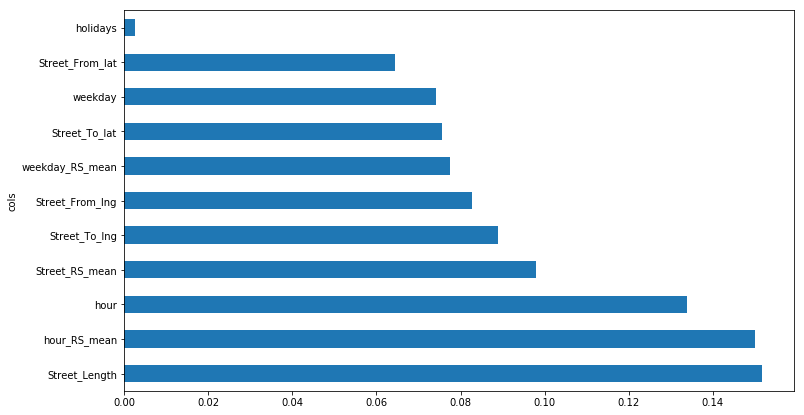

In [26]:
fi = rf_feat_importance(clf, X_train)
fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [27]:
fi

,cols,imp
0,Street_Length,0.151642
10,hour_RS_mean,0.150052
7,hour,0.133950
8,Street_RS_mean,0.098065
4,Street_To_lng,0.088843
2,Street_From_lng,0.082842
9,weekday_RS_mean,0.077583
3,Street_To_lat,0.075702
5,weekday,0.074247
1,Street_From_lat,0.064457


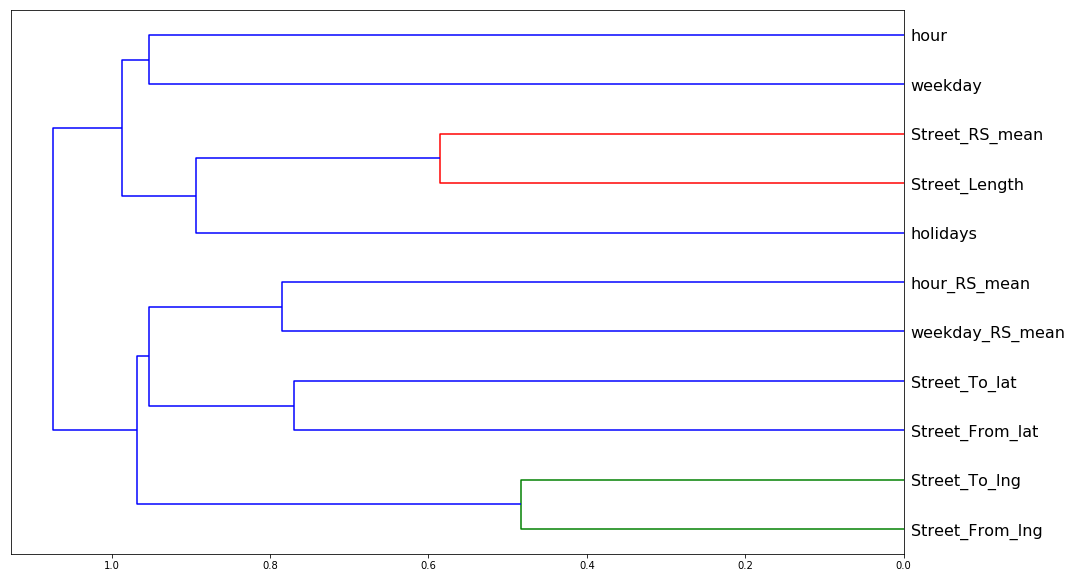

In [28]:
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(X_train).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_train.columns, orientation='left', leaf_font_size=16)
plt.show()

### tune hyperparameters

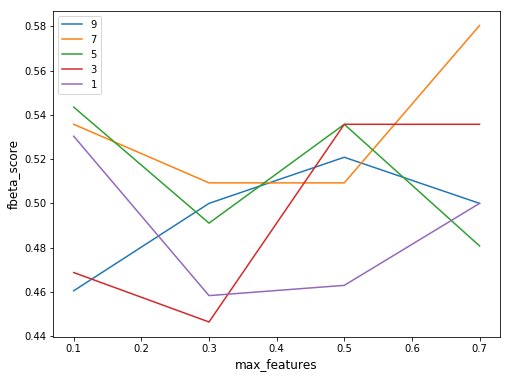

CPU times: user 2.22 s, sys: 610 ms, total: 2.83 s
Wall time: 5.14 s


In [29]:
%%time
max_features=[0.1, 0.3, 0.5, 0.7]
min_samples_leaf= [9, 7, 5, 3, 1]

plt.figure(figsize=(8,6))

mylist = []
for j in min_samples_leaf:
    x = []
    for i in max_features:
        clf = RandomForestClassifier(n_jobs=-1, n_estimators=50, max_features=i, min_samples_leaf=j)
        clf.fit(X_train, y_train)
        dic = {'max_features':i, 'min_samples_leaf':j, 'fbeta_score':fbeta_score(y_val, clf.predict(X_val), 0.5)}
        mylist.append(dic)
        x.append(dic['fbeta_score'])
    plt.plot(max_features,x, label=str(j))

plt.xlabel('max_features', fontsize=12)
plt.ylabel('fbeta_score', fontsize=12)
plt.legend(loc='best')
plt.show()

In [30]:
pd.DataFrame(mylist, columns=['max_features', 'min_samples_leaf', 'fbeta_score']).sort_values('fbeta_score', ascending=False)

,max_features,min_samples_leaf,fbeta_score
7,0.7,7,0.580357
8,0.1,5,0.543478
10,0.5,5,0.535714
14,0.5,3,0.535714
4,0.1,7,0.535714
15,0.7,3,0.535714
16,0.1,1,0.530303
2,0.5,9,0.520833
5,0.3,7,0.509259
6,0.5,7,0.509259


### final models

#### model 1

In [31]:
%%time
clf = RandomForestClassifier(n_jobs=-1, n_estimators=50, 
                             max_features=0.5, min_samples_leaf=5)
clf.fit(X, y)

CPU times: user 96.9 ms, sys: 27.4 ms, total: 124 ms
Wall time: 143 ms


In [32]:
print('data score: %f\ntrain score: %f\nval score: %f' % 
      (fbeta_score(y, clf.predict(X), 0.5),
       fbeta_score(y_train, clf.predict(X_train), 0.5),
       fbeta_score(y_val, clf.predict(X_val), 0.5)))

data score: 0.812911
train score: 0.788303
val score: 0.766129


In [33]:
pred = clf.predict(X_test)

In [34]:
pd.DataFrame({'id':test.id, 'any_spot':pred}, columns=['id','any_spot']).to_csv('preds/pred1.csv', index=False)

#### model 2

In [39]:
%%time
clf1 = RandomForestClassifier(n_jobs=-1, n_estimators=50, 
                             max_features=0.7, min_samples_leaf=7)
clf1.fit(X, y)

CPU times: user 108 ms, sys: 27.9 ms, total: 136 ms
Wall time: 143 ms


In [40]:
print('data score: %f\ntrain score: %f\nval score: %f' % 
      (fbeta_score(y, clf1.predict(X), 0.5),
       fbeta_score(y_train, clf1.predict(X_train), 0.5),
       fbeta_score(y_val, clf1.predict(X_val), 0.5)))

data score: 0.795523
train score: 0.774555
val score: 0.742188


In [41]:
pred = clf1.predict(X_test)

In [42]:
pd.DataFrame({'id':test.id, 'any_spot':pred}, columns=['id','any_spot']).to_csv('preds/pred2.csv', index=False)

## XGBoost

In [43]:
import xgboost as xgb

/Users/chuanxu/anaconda/envs/fastai/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

#### tune `num_round`

In [69]:
%%time
param = {'objective':'multi:softmax', 'num_class':2}
num_round = [170, 175, 180, 185, 190, 195, 200, 205, 210]
dic = []
for n in num_round:
    bst = xgb.train(param, dtrain, n)
    Yhat_train = bst.predict(dtrain)
    Yhat_val = bst.predict(dval)
    dic.append({'num_round':n,
            'train score':fbeta_score(y_train, Yhat_train, 0.5), 
            'validation score':fbeta_score(y_val, Yhat_val, 0.5)})

CPU times: user 4.66 s, sys: 9.28 s, total: 13.9 s
Wall time: 5.66 s


In [70]:
result = pd.DataFrame(dic, columns = ['num_round', 'train score', 'validation score'])
result.sort_values('validation score',  ascending=False)

,num_round,train score,validation score
0,170,0.957447,0.540541
1,175,0.956002,0.540541
4,190,0.961857,0.526316
5,195,0.964863,0.526316
6,200,0.963354,0.526316
7,205,0.960374,0.526316
8,210,0.961857,0.526316
2,180,0.964863,0.506757
3,185,0.964863,0.506757


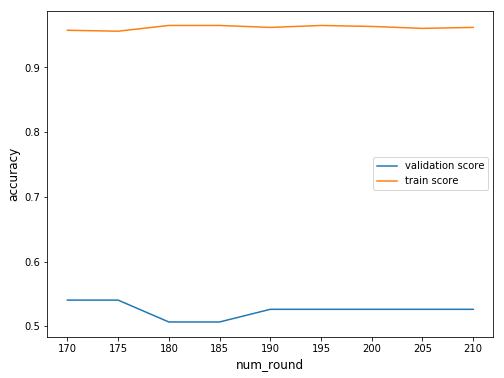

In [71]:
plt.figure(figsize=(8,6))
plt.plot(num_round, result['validation score'], label='validation score')
plt.plot(num_round, result['train score'], label='train score')
plt.xlabel('num_round', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc='best')
plt.show()

#### tune `learning_rate`

In [93]:
%%time
learning_rate = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05,
                0.06, 0.07, 0.08, 0.09, 0.10]
dic = []

for i in learning_rate:
    param = {'learning_rate':i, 'objective':'multi:softmax', 'num_class':2}
    bst = xgb.train(param, dtrain, 170)
    Yhat_train = bst.predict(dtrain)
    Yhat_val = bst.predict(dval)
    dic.append({'learning_rate':i,
            'train score':fbeta_score(y_train, Yhat_train, 0.5), 
            'validation score':fbeta_score(y_val, Yhat_val, 0.5)})

/Users/chuanxu/anaconda/envs/fastai/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


CPU times: user 5.34 s, sys: 10.8 s, total: 16.2 s
Wall time: 6.61 s


In [94]:
result = pd.DataFrame(dic, columns = ['learning_rate', 'train score', 'validation score'])
result.sort_values('validation score',  ascending=False)

,learning_rate,train score,validation score
8,0.08,0.917457,0.555556
5,0.05,0.899160,0.551471
7,0.07,0.913165,0.551471
9,0.09,0.928690,0.540541
6,0.06,0.897507,0.514706
10,0.10,0.930105,0.512821
4,0.04,0.888252,0.492424
1,0.01,0.813953,0.483871
2,0.02,0.850202,0.483871
3,0.03,0.859965,0.468750


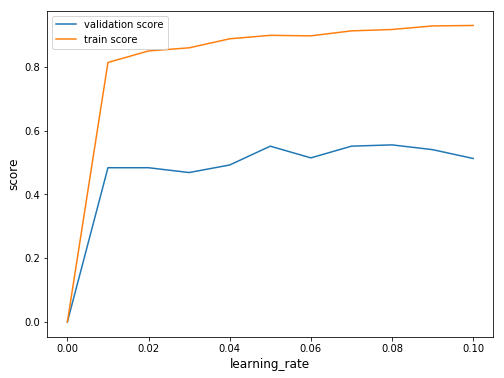

In [95]:
plt.figure(figsize=(8,6))
plt.plot(learning_rate, result['validation score'], label='validation score')
plt.plot(learning_rate, result['train score'], label='train score')
plt.xlabel('learning_rate', fontsize=12)
plt.ylabel('score', fontsize=12)
plt.legend(loc='best')
plt.show()

#### tune `max_depth` and `min_child_weight`

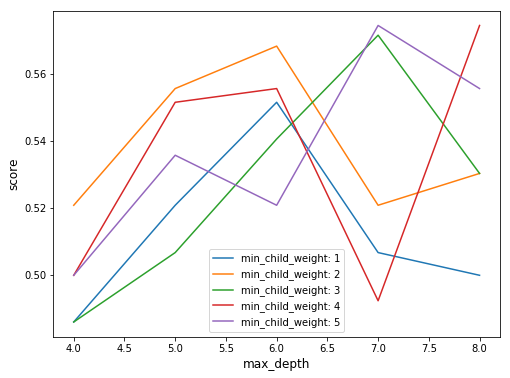

CPU times: user 12.5 s, sys: 24.6 s, total: 37.1 s
Wall time: 15.8 s


In [118]:
%%time
dic = []
min_child_weight = [1, 2, 3, 4, 5]
max_depth = [4, 5, 6, 7, 8]

plt.figure(figsize=(8,6))


for i in min_child_weight:
    x = []
    for j in max_depth:
        param = {'learning_rate':0.05, 'objective':'multi:softmax', 'num_class':2,
                'min_child_weight':i, 'max_depth':j}
        bst = xgb.train(param, dtrain, 170)
        Yhat_train = bst.predict(dtrain)
        Yhat_val = bst.predict(dval)
        dic.append({'min_child_weight':i,
                    'max_depth':j,
                    'train score':fbeta_score(y_train, Yhat_train, 0.5), 
                    'validation score':fbeta_score(y_val, Yhat_val, 0.5)})
        x.append(fbeta_score(y_val, Yhat_val, 0.5))
    plt.plot(max_depth, x, label= 'min_child_weight: ' + str(i))

plt.xlabel('max_depth', fontsize=12)
plt.ylabel('score', fontsize=12)
plt.legend(loc='best')
plt.show()

In [119]:
result = pd.DataFrame(dic, columns = ['min_child_weight', 'max_depth', 
                                      'train score', 'validation score'])
result.sort_values('validation score',  ascending=False)

,min_child_weight,max_depth,train score,validation score
23,5,7,0.884058,0.574324
19,4,8,0.908065,0.574324
13,3,7,0.893965,0.571429
7,2,6,0.881020,0.568182
24,5,8,0.893165,0.555556
17,4,6,0.871855,0.555556
6,2,5,0.838635,0.555556
2,1,6,0.899160,0.551471
16,4,5,0.833824,0.551471
12,3,6,0.873337,0.540541


### fit final model

In [126]:
d = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test)

#### model 1

In [127]:
param = {'learning_rate':0.05, 'objective':'multi:softmax', 'num_class':2,
         'min_child_weight':5, 'max_depth':7}
bst = xgb.train(param, d, 170)

In [128]:
print('data score: %f\ntrain score: %f\nval score: %f' % 
      (fbeta_score(y, bst.predict(d), 0.5),
       fbeta_score(y_train, bst.predict(dtrain), 0.5),
       fbeta_score(y_val, bst.predict(dval), 0.5)))

data score: 0.872317
train score: 0.847710
val score: 0.808824


In [129]:
pred = bst.predict(dtest)

In [130]:
pd.DataFrame({'id':test.id, 'any_spot':pred}, columns=['id','any_spot']).to_csv('preds/xbg_pred1.csv', index=False)

#### model 2

In [131]:
param = {'learning_rate':0.05, 'objective':'multi:softmax', 'num_class':2,
         'min_child_weight':4, 'max_depth':8}
bst1 = xgb.train(param, d, 170)

In [132]:
print('data score: %f\ntrain score: %f\nval score: %f' % 
      (fbeta_score(y, bst1.predict(d), 0.5),
       fbeta_score(y_train, bst1.predict(dtrain), 0.5),
       fbeta_score(y_val, bst1.predict(dval), 0.5)))

data score: 0.904227
train score: 0.883913
val score: 0.882353


In [133]:
pred = bst1.predict(dtest)

In [134]:
#kaggle score: 0.56751
pd.DataFrame({'id':test.id, 'any_spot':pred}, columns=['id','any_spot']).to_csv('preds/xbg_pred2.csv', index=False)

### check val is good or not

In [58]:
kaggle_score = [0.49815, 0.48109]
score_on_val = [0.41012218081600849, 0.41673949769920604]

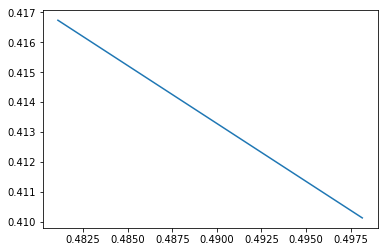

In [59]:
plt.plot(kaggle_score, score_on_val)